In [1]:
import numpy as np
import matplotlib.pyplot as plt

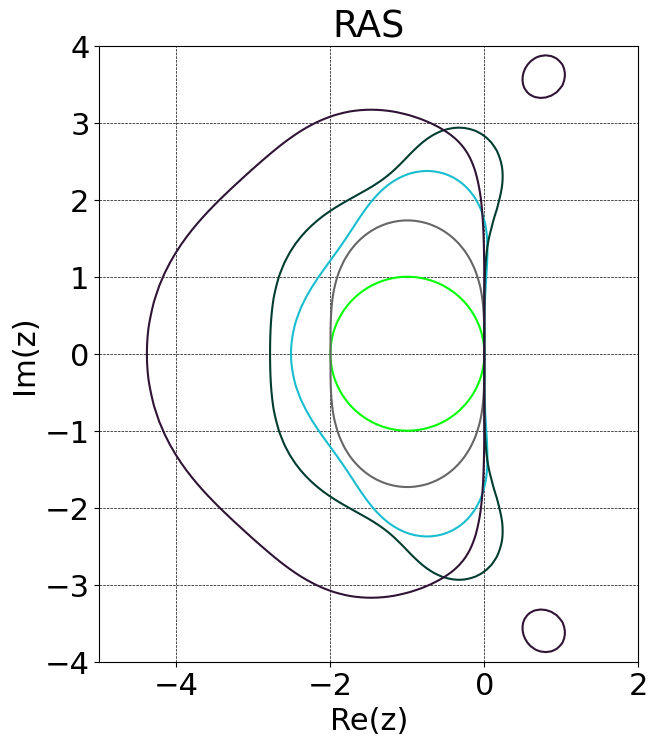

In [96]:
def R(z,A,b):
    # ERK stability function for variable z, vector b, matrix A
    s = A.shape[0]
    Rz = np.zeros(z.shape, dtype = np.complex_)
    for i in range(len(z)):
        for j in range(len(z[i])):
            x = z[i][j]
            B = np.zeros((s,s))
            for k in range(s):
                B = B + x**k*np.linalg.matrix_power(A,k)
                #print(B)
            Rz[i][j] = 1 + x*np.transpose(b).dot(B).dot(np.ones((s,1)))  
    return Rz
    

nx = 100
ny = 160
x = np.linspace(-5, 2, nx)
y = np.linspace(-4, 4, ny)
xg,yg = np.meshgrid(x, y)
z = xg + 1j*yg
f_list = []

# define various stability functions

# forward euler
f_list.append(1 + z)

# mitpoint rule with Euler predictor
f_list.append(1 + z + 0.5*z**2)

# Kutta's method
A = np.array([[0, 0, 0],
              [0.5, 0, 0],
              [-1, 2, 0]])
b = np.array([1/6, 2/3, 1/6])
f_list.append(R(z, A, b))

# 4 stage 4th order RK
A = np.array(
    [[0, 0, 0, 0],
     [0.5, 0, 0, 0],
     [0, 0.5, 0, 0],
     [0, 0, 1, 0]]
)
b = np.array([1/6, 1/3, 1/3, 1/6])
f_list.append(R(z, A, b))

# DOPRI5(4)
A = np.array(
    [[0, 0, 0, 0, 0, 0, 0],
     [1/5, 0, 0, 0, 0, 0, 0],
     [3/40, 9/40, 0, 0, 0, 0, 0],
     [44/45, -56/15, 32/9, 0, 0, 0, 0],
     [19372/6561, -25360/2187, 64448/6561, -212/729, 0, 0, 0],
     [9017/3168, -355/33, 46732/5247, 49/176, -5103/18656, 0, 0],
     [35/384, 0, 500/1113, 125/192, -2187/6784,11/84, 0]]
)
b = np.array([5179/57600, 0, 7571/16695, 393/640, -92097/339200, 187/2100, 1/40])
f_list.append(R(z, A, b))


# plot RAS contours
absf_list = []
for f in f_list:
    absf_list.append((f.real)**2 + (f.imag)**2)
colors = ["brg", "Dark2", "tab10", "BrBG", "twilight_shifted"]
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(8,8))
for i in range(len(f_list)):
    plt.contour(xg, yg, absf_list[i], np.arange(2), cmap = colors[i])  
plt.title("RAS")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
ax.set_aspect(1)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.savefig('hw2 problem 2 RAS.png')
plt.show()